In [1]:
#math/data libs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


#ml libs
import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

2024-04-15 13:45:49.657581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 13:45:49.657684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 13:45:49.802774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = pd.read_csv("/kaggle/input/hrv-data/hrv dataset/data/final/train.csv").drop(columns="datasetId")
test_dir = pd.read_csv("/kaggle/input/hrv-data/hrv dataset/data/final/test.csv").drop(columns="datasetId")

In [3]:
#train
train_samples = train_dir.drop(columns='condition').to_numpy()
train_labels = train_dir['condition'].to_numpy()

#test
test_samples = test_dir.drop(columns='condition').to_numpy()
test_labels = test_dir['condition'].to_numpy()

In [4]:
#normalizing features
scaler = MinMaxScaler(feature_range=(0,1))
train_samples = scaler.fit_transform(train_samples)
test_samples = scaler.fit_transform(test_samples)

#one-hot-encoding labels
one_hot_encoder = OneHotEncoder(categories='auto')
train_labels = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1)).toarray()

In [5]:
#build the model
model = Sequential([
    Dense(34, input_shape=[34,], activation='relu'),
#     Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573 (6.14 KB)

 Trainable params: 1,573 (6.14 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(Adam(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_samples, train_labels, validation_split=0.1, batch_size=16, epochs=50, shuffle=True, verbose=2)

Epoch 1/50


I0000 00:00:1713188772.508899      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713188772.524790      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713188804.739550      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20773/20773 - 38s - 2ms/step - accuracy: 0.6189 - loss: 0.8476 - val_accuracy: 0.6466 - val_loss: 0.7796
Epoch 2/50
20773/20773 - 34s - 2ms/step - accuracy: 0.6767 - loss: 0.7290 - val_accuracy: 0.7120 - val_loss: 0.6808
Epoch 3/50
20773/20773 - 34s - 2ms/step - accuracy: 0.7404 - loss: 0.6408 - val_accuracy: 0.7674 - val_loss: 0.6033
Epoch 4/50
20773/20773 - 34s - 2ms/step - accuracy: 0.7812 - loss: 0.5734 - val_accuracy: 0.7958 - val_loss: 0.5442
Epoch 5/50
Epoch 5/50
20773/20773 - 34s - 2ms/step - accuracy: 0.8050 - loss: 0.5168 - val_accuracy: 0.8211 - val_loss: 0.4886
Epoch 6/50
20773/20773 - 34s - 2ms/step - accuracy: 0.8263 - loss: 0.4695 - val_accuracy: 0.8354 - val_loss: 0.4488
Epoch 7/50
20773/20773 - 34s - 2ms/step - accuracy: 0.8414 - loss: 0.4329 - val_accuracy: 0.8499 - val_loss: 0.4181
Epoch 8/50
20773/20773 - 34s - 2ms/step - accuracy: 0.8550 - loss: 0.3996 - val_accuracy: 0.8648 - val_loss: 0.3839
Epoch 9/50
20773/20773 - 34s - 2ms/step - accuracy: 0.8663 - loss: 0.370

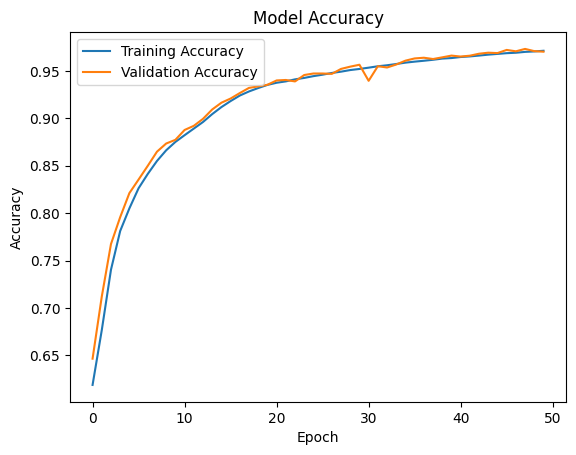

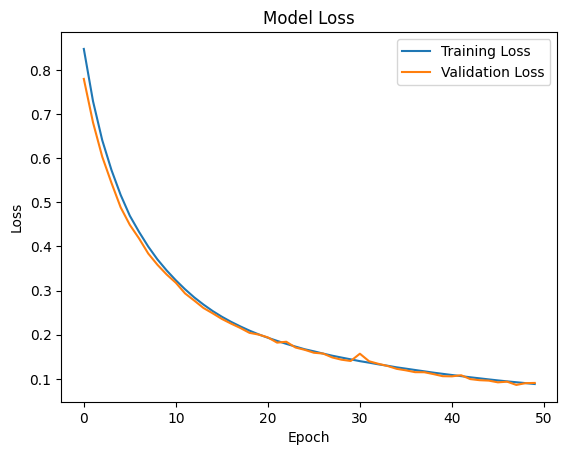

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
import numpy as np

# Generate classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score

# Classification report
y_pred = model.predict(test_samples)
y_pred_classes = np.argmax(y_pred, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)
print("Classification Report:")
print(classification_report(test_labels_classes, y_pred_classes))

# Accuracy
accuracy = accuracy_score(test_labels_classes, y_pred_classes)
print("Accuracy:", accuracy)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     11782
           1       0.96      0.99      0.97     22158
           2       0.94      0.94      0.94      7093

    accuracy                           0.96     41033
   macro avg       0.96      0.95      0.96     41033
weighted avg       0.96      0.96      0.96     41033

Accuracy: 0.962542343967051


In [11]:
model.save('/kaggle/working/hrv_nn50.h5')